                                    Lab Session - 4
                                    MSIS Dashboard
                                    
      Task: Create MSIS Dashboard for Santa Clara University that will help students and recruiters make decisions. 
      
      Steps: We extract data from various websites such as Payscale.com, scu.edu and other web pages where we get information on University/program ranking, job prospects, cost of living, tution fee etc. 
      
     I have explained the claim, data, qualifier, warrant, backing and reservation underneath each graph in each section of this notebook. 

# CLAIM: Santa Clara university is very good for pursuing MSIS Degree
  QUALIFIER: I have taken Silicon Valley universities to compare the results (Applies to all the analysis done in this iteration)

In [1]:
from bs4 import BeautifulSoup

import requests

req  = requests.get("https://www.collegefactual.com/colleges/santa-clara-university/paying-for-college/room-and-board/")

soup = BeautifulSoup(req.content, 'html.parser')

table = soup.find_all('table')

table = soup.find_all('table')[2]

rows = table.find_all('tr')[2:]


In [2]:
for row in rows:
    cols = row.find_all('td')

data = {
    'Expense' : [],
    'On Campus' : [],
    'Off Campus' : []
  }

In [3]:
for row in rows:
    cols = row.find_all('td')    
    data['Expense'].append( cols[0].get_text() )
    data['On Campus'].append( cols[1].get_text() )
    data['Off Campus'].append( cols[2].get_text() )

In [4]:
import pandas as pd;
Expense_Scu = pd.DataFrame( data )

Expense_Scu.to_csv("Expense_scu.csv")

Similary, we can extract the living expense for few other universities in west coast for comparison purpose

In [5]:
# Living expense for SJSU

req  = requests.get("https://www.collegefactual.com/colleges/san-jose-state-university/paying-for-college/room-and-board/")

soup = BeautifulSoup(req.content, 'html.parser')

table = soup.find_all('table')

table = soup.find_all('table')[2]

rows = table.find_all('tr')[2:]

In [6]:
for row in rows:
    cols = row.find_all('td')

data = {
    'Expense' : [],
    'On Campus' : []
  }

In [7]:
for row in rows:
    cols = row.find_all('td')    
    data['Expense'].append( cols[0].get_text() )
    data['On Campus'].append( cols[1].get_text() )

In [8]:
import pandas as pd;
Expense_Sjsu = pd.DataFrame( data )

Expense_Sjsu.to_csv("Expense_sjsu.csv")

Also, we extract for other universities by replacing the URL with the university URL

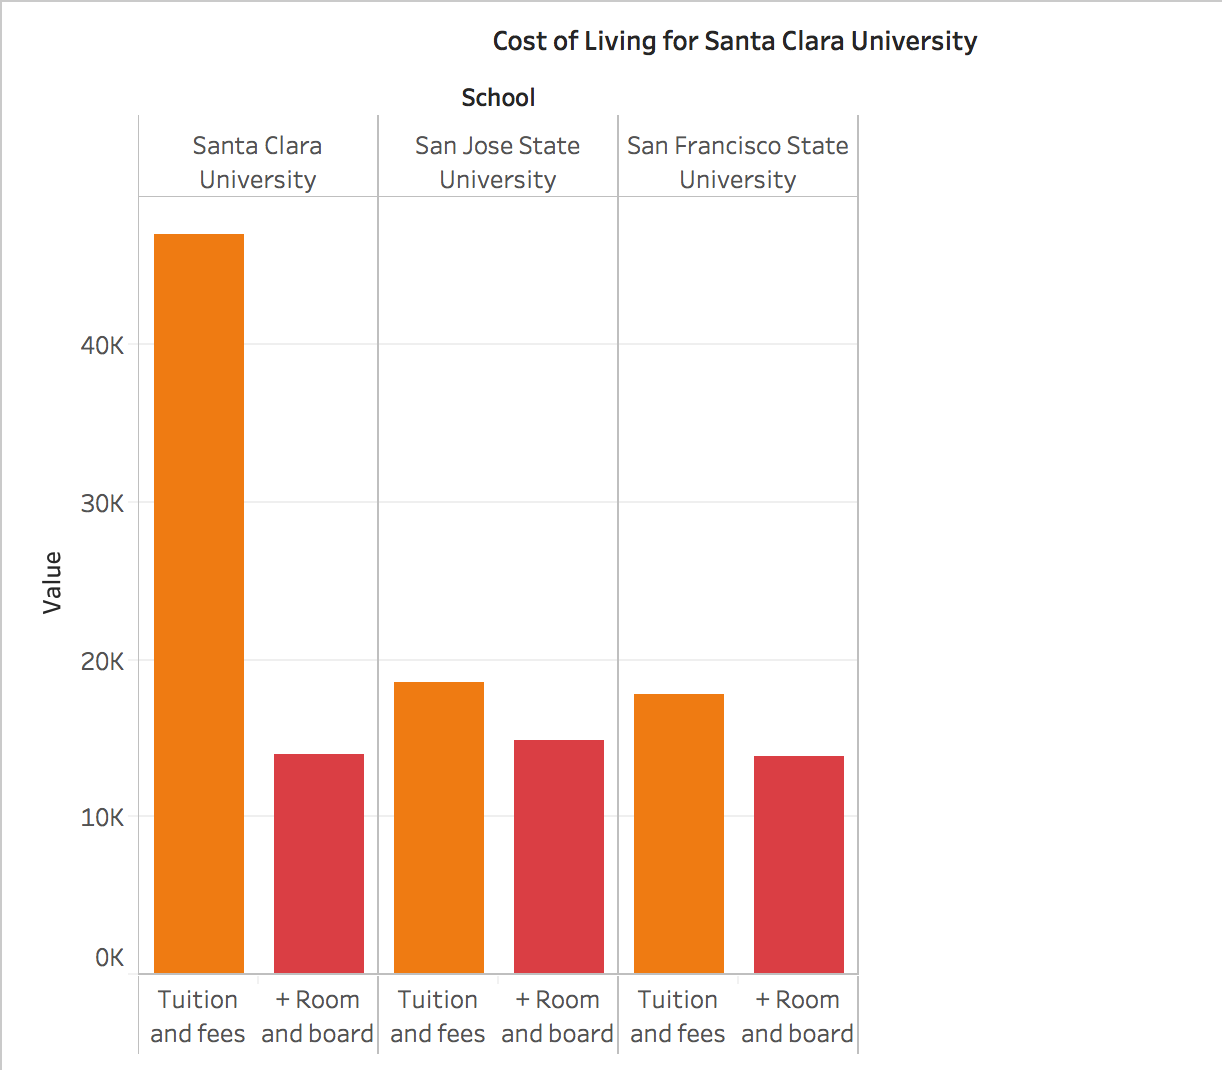

In [42]:
from IPython.display import Image
Image("cost of living.png")

                      Data: https://www.collegefactual.com/colleges/santa-clara-university/paying-for-college/room-and-board/  
                       Description: We find that the above graph does not support the claim as "cost of living" alone cannot be a measure in proving our claim. In the graph, I have taken the cost of living by extracting the tution fee (That includes the number of units and fee for each unit) and the rent expenses along with food under the category of (Room and Board). 
                       
                        Warrant: If the living expense is high, it shows that the it will be difficult pursue student life at SCU. 
                        Backing: http://www.areavibes.com/santa+clara-ca/cost-of-living/
                        Reservation: Number of units (courses) offered at Santa Clara is way more than other universities and hence the high Tution fee: https://www.scu.edu/business/ms-information-systems/curriculum/
                        
                        Disadvantage: It does not support the claim as mentioned in the description 
                        Advantage: It is also a factor to consider admission in one university

# ranking of all universities



In [13]:
req  = requests.get("https://www.scu.edu/business/ms-information-systems/prospective-students/class-profile/")

In [14]:
soup = BeautifulSoup(req.content, 'html.parser')
import json
script =  soup.find_all('p')
linkData = script


var1 = linkData[1].text
var2 = linkData[2].text
var3 = linkData[3].text
var4 = linkData[4].text
var5 = linkData[5].text
var6 = linkData[6].text
var7 = linkData[7].text
var8 = linkData[8].text
var9 = linkData[9].text
var10 = linkData[10].text
var11 = linkData[11].text

# Approach 1: Just print variables comma-separated
print (var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11)


                      Women : 51% Average age : 26 Multilingual :  89% Average undergraduate GPA  3.2 Average GMAT  650 Average GRE  308 % holding graduate degrees  20% Average work experience :  2.3 years Employed at time of admission : 66% Selected hiring companies :  Apple, Cisco, Ernst & Young, Facebook, NetApp, NVIDIA, Symantec, Twitter


In [9]:
import pandas as pd
url = 'http://higheredublog.com/top-universities-for-ms-in-mis-in-usa/'
data = pd.read_html(url, header = 0)

data1 = data[0]
data1.head()

data1.columns = ['RANKING', 'UNIVERSITY', 'PROGRAM']

df = pd.DataFrame(data1)

df.to_csv('Ranking_universities.csv', index=False, encoding='utf-8')

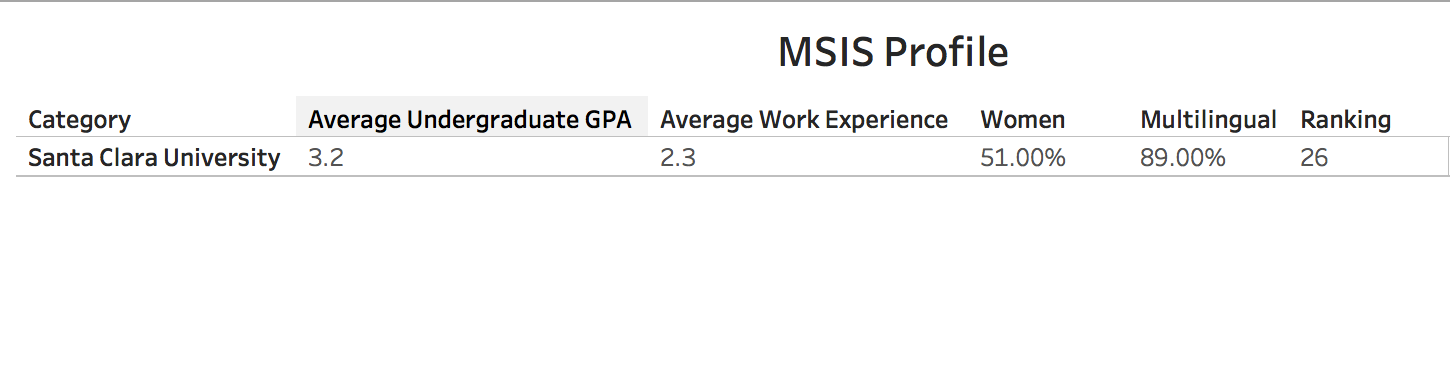

In [41]:
from IPython.display import Image
Image ("MSIS Profile.png")

Data: http://higheredublog.com/top-universities-for-ms-in-mis-in-usa/

Desription: The MSIS profile gives us the overall ranking of SCU MSIS program in US and also shows the demographics of the university. In the data, we can see the average work experience of a person pursuing the master's degree and their GPA. 

Warrant: Equal propotion of men and women in the class and mix of culture within the university can give more exposure to students, better global engagement and wider networks. 

Backing: http://www.independent.co.uk/student/career-planning/getting-job/its-good-to-talk-how-being-multi-lingual-can-boost-your-career-969235.html

Reservation: I am not able to find any reservation as this is just a profile. 

Advantage: Gives a clear idea on the ranking and the culture of the university in a go
Disadvantage: Want to compare how it is better option when compared to other universities



We will now extract the MSIS payscale for SCU graduates

In [11]:
response3 = requests.get("https://www.payscale.com/research/US/Degree=Master_of_Information_Science_(MIS)/Salary")
html3 = response3.content
soup = BeautifulSoup(html3, 'html.parser')
soup.prettify(formatter=lambda s: s.replace(u'\xa0', ' '))
#print (soup.prettify())
pay = soup.find_all("div", {"class":"bar-chart-bootstrap"})
for i in pay:
   print(i.text)
pay1=[]
for item in pay:
   pay1.append(item.text)

JobAverageMinMaxSoftware Engineer111 profiles$86,916$65K$122KData Analyst83 profiles$63,839$46K$82KBusiness Analyst, IT69 profiles$67,970$51K$86KGet a personalized salary report!Location:Years in Field/Career:Years in Field/Career:United States (change)Information Technology (IT) Manager67 profiles$100,541$65K$131KProject Manager, Information Technology (IT)54 profiles$90,546$64K$119KSoftware Developer47 profiles$72,474$58K$104KInformation Technology (IT) Director46 profiles$118,960$73K$171KSee all employers for Master of Information Science (MIS) »See all employers for Master of Information Science (MIS) »Currency: USDUpdated: 11 Oct 2017Individuals Reporting: 2,485View Table


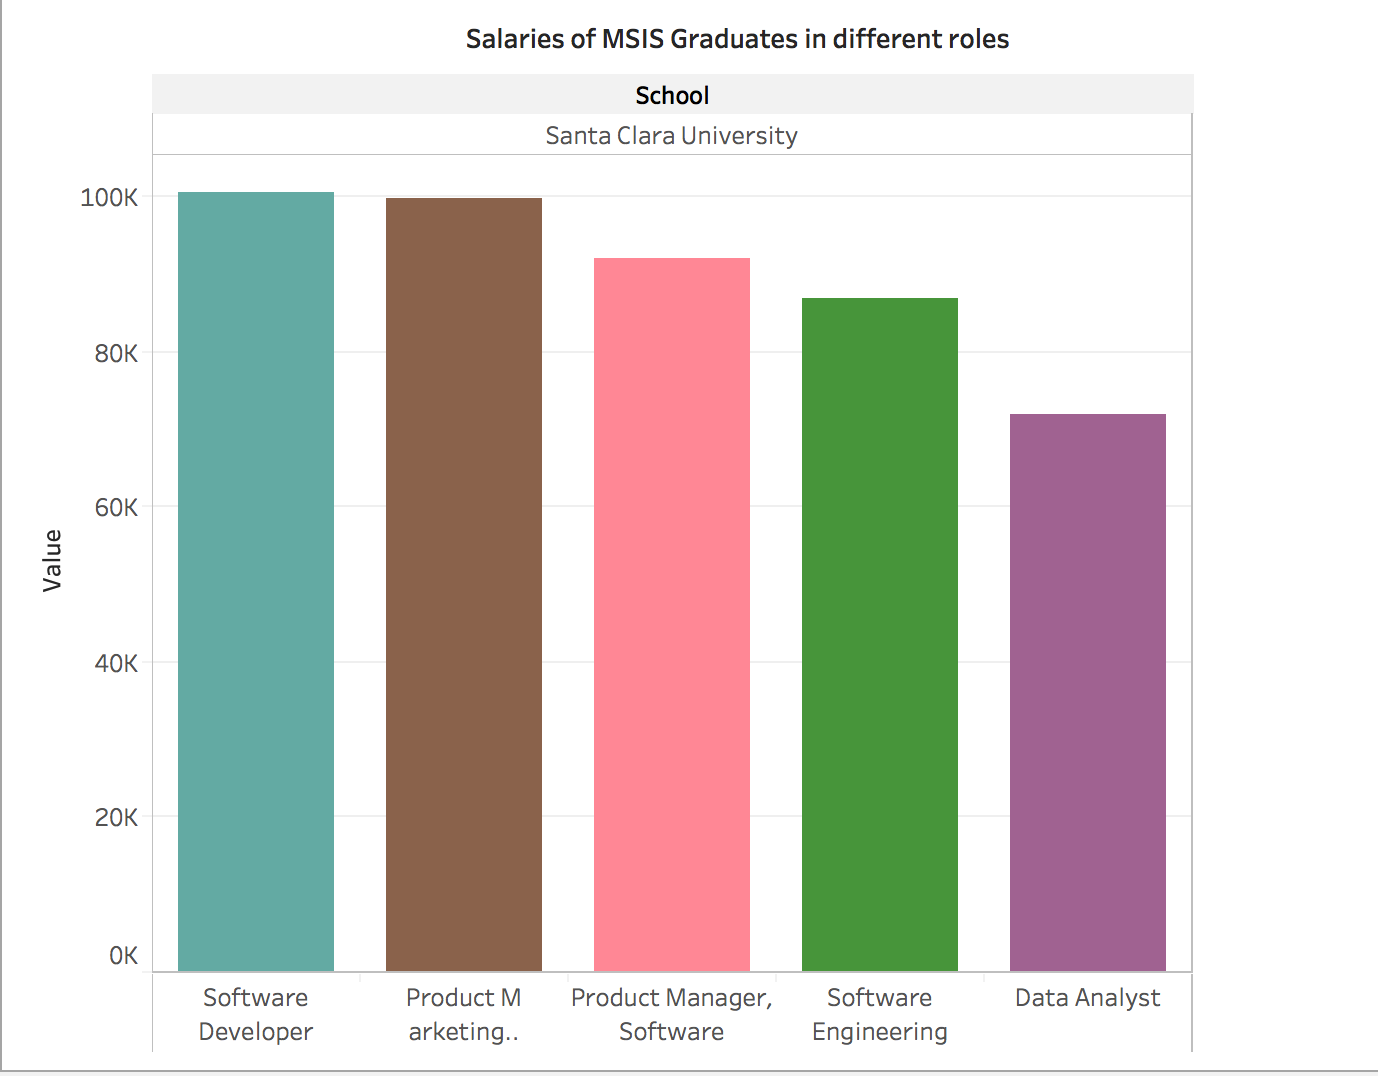

In [39]:
from IPython.display import Image
Image("Average Salary.png")

Data: https://www.payscale.com/research/US/Degree=Master_of_Information_Science_(MIS)/Salary

Description of the graph: The graph shows that Software Developers are one the highest paid jobs for MSIS students. 
I wanted to show the average salary in silicon valley and compare it with the salary earned by MSIS graduates. This will be the road map. However, I have collected the data and it shows that SCU gradutes in these role earn more than average pay scale. I will be including the graph in the next iteration. 

Warrant: Higher job prospects are more desirable and hence it strongly supports the claim. 

Backing: https://www.scu.edu/news-and-events/press-releases/2016/april-2016/santa-clara-university-ranks-high-on-payscale-college-roi-report.html

Reservation: The average salary is being compared with just silicon valley universities, but when taken at a higher scope and including the graduates from ivey league colleges, the average salary for scu graduates may become lower. 

Future scope: As explained in the description, I would like to add average payscale in Silicon valley which can provide a better picture. 



The payscale can be again extracted for different universities by modifying the URL

# Acceptance RATE at different california Universities 

In [37]:
response3 = requests.get("http://www.acceptancerate.com/california")
html3 = response3.content
soup = BeautifulSoup(html3, 'html.parser')
#soup.prettify(formatter=lambda s: s.replace(u'\xa0', ' '))

acc_rate= soup.find_all("table", "table table-hover table-condensed listing_table")
#for i in acc_rate:
 #   print(i.text)
acc=[]
for mytable in acc_rate:
    acc_body = mytable.find('tbody')
   

Comparison between 3 Universities

In [16]:
req = requests.get('http://study.com/articles/Top_Ranked_School_for_Information_Technology_-_San_Jose_CA.html')

In [17]:
soup = BeautifulSoup(req.content, 'html.parser')

In [20]:
table = soup.find_all('table')[0]

In [21]:
rows = table.find_all('tr')[2:]

In [22]:
for row in rows:
    cols = row.find_all('td')

In [23]:
data = {
    'Category' : [],
    'Santa Clara University' : [],
    'San Jose State University' : [],
    'University of San Francisco' : []
}

In [24]:
for row in rows:
    cols = row.find_all('td')    
    data['Category'].append( cols[0].get_text() )
    data['Santa Clara University'].append( cols[1].get_text() )
    data['San Jose State University'].append( cols[2].get_text() )
    data['University of San Francisco'].append( cols[3].get_text() )

In [25]:
import pandas as pd;
compareData = pd.DataFrame( data )

In [26]:
compareData.to_csv("Compare.csv")